In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [5]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [24]:
data = []
paths = []
result = []

for r, d, f in os.walk(r"C:\Users\galis\Downloads\archive\datasets\yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())


In [26]:

paths = []
for r, d, f in os.walk(r"C:\Users\galis\Downloads\archive\datasets\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [27]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [28]:
result = np.array(result)
result = result.reshape(139,2)

In [29]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [30]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())



Instructions for updating:
Colocations handled automatically by placer.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                               

In [31]:
y_train.shape

(111, 2)

In [32]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))



Train on 111 samples, validate on 28 samples
Epoch 1/30
111/111 [==============================] - ETA: 0s - loss: 24.5233

C:\Users\galis\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


111/111 [==============================] - 6s 50ms/sample - loss: 24.5233 - val_loss: 83.2194
Epoch 2/30
111/111 [==============================] - 5s 42ms/sample - loss: 26.0167 - val_loss: 12.1541
Epoch 3/30
111/111 [==============================] - 2s 20ms/sample - loss: 10.4539 - val_loss: 17.7779
Epoch 4/30
111/111 [==============================] - 2s 17ms/sample - loss: 5.4230 - val_loss: 12.9551
Epoch 5/30
111/111 [==============================] - 2s 16ms/sample - loss: 3.2031 - val_loss: 17.2381
Epoch 6/30
111/111 [==============================] - 2s 15ms/sample - loss: 1.8032 - val_loss: 14.5178
Epoch 7/30
111/111 [==============================] - 2s 15ms/sample - loss: 1.6930 - val_loss: 8.5776
Epoch 8/30
111/111 [==============================] - 2s 15ms/sample - loss: 0.5563 - val_loss: 6.4213
Epoch 9/30
111/111 [==============================] - 2s 15ms/sample - loss: 1.1149 - val_loss: 6.4231
Epoch 10/30
111/111 [==============================] - 2s 15ms/sample - los

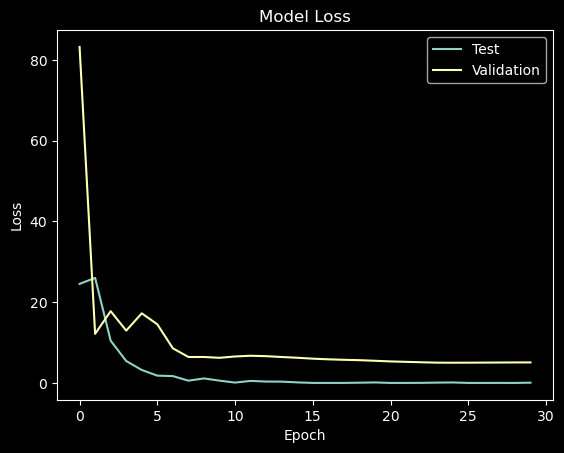

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [34]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

C:\Users\galis\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


93.78740191459656% Confidence This Is Its a Tumor


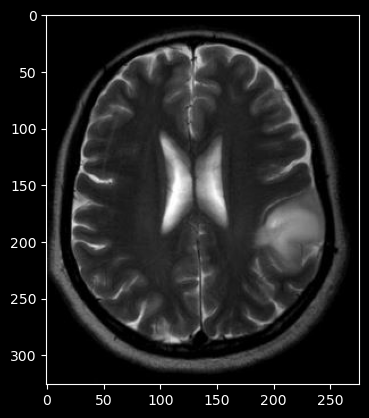

In [36]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\galis\Downloads\archive\datasets\no\N22.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A No, Its not a tumor


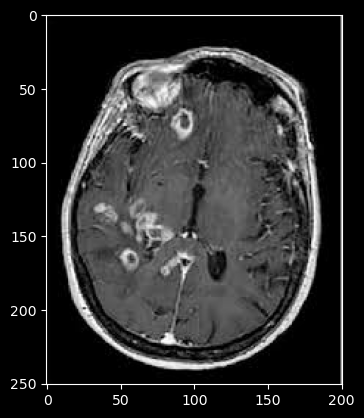

In [37]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\galis\Downloads\archive\datasets\yes\Y78.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))